In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from catboost import CatBoostClassifier
import joblib

Learning rate set to 0.158677
0:	learn: 1.4641520	total: 346ms	remaining: 5m 45s
1:	learn: 1.3784234	total: 586ms	remaining: 4m 52s
2:	learn: 1.3235890	total: 810ms	remaining: 4m 29s
3:	learn: 1.2829607	total: 1.03s	remaining: 4m 17s
4:	learn: 1.2508208	total: 1.28s	remaining: 4m 15s
5:	learn: 1.2242918	total: 1.53s	remaining: 4m 13s
6:	learn: 1.2043991	total: 1.75s	remaining: 4m 8s
7:	learn: 1.1873996	total: 1.98s	remaining: 4m 5s
8:	learn: 1.1729628	total: 2.2s	remaining: 4m 2s
9:	learn: 1.1606145	total: 2.45s	remaining: 4m 2s
10:	learn: 1.1490066	total: 2.68s	remaining: 4m 1s
11:	learn: 1.1394668	total: 2.88s	remaining: 3m 57s
12:	learn: 1.1315443	total: 3.05s	remaining: 3m 51s
13:	learn: 1.1232851	total: 3.27s	remaining: 3m 50s
14:	learn: 1.1169951	total: 3.42s	remaining: 3m 44s
15:	learn: 1.1104916	total: 3.66s	remaining: 3m 45s
16:	learn: 1.1036552	total: 3.85s	remaining: 3m 42s
17:	learn: 1.0980444	total: 4.04s	remaining: 3m 40s
18:	learn: 1.0903627	total: 4.28s	remaining: 3m 40

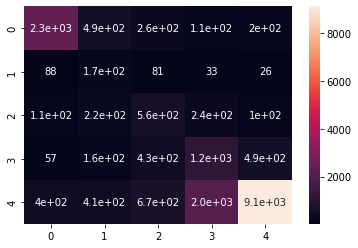

In [2]:
df = pd.read_csv("../input/amazon-dataset-csv-generator/PolynomialInternshipDrive2022.csv", nrows = 100000 )
df = df.dropna()
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=42, stratify=df.overall.values)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

tfidf_vec = TfidfVectorizer(
 tokenizer=word_tokenize,
 token_pattern=None
 )

tfidf_vec.fit(train_df.review)

xtrain = tfidf_vec.transform(train_df.review)
xtest = tfidf_vec.transform(test_df.review)

model = CatBoostClassifier(task_type="GPU")


model.fit(xtrain, train_df.overall)

preds = model.predict(xtest)
# calculate accuracy
accuracy = metrics.accuracy_score(test_df.overall, preds)

confusion_matrix = metrics.confusion_matrix(preds, test_df.overall)
        
sns.heatmap(confusion_matrix, annot=True)
joblib.dump(model,"lgbmclf.bin" )

print(f"Accuracy = {accuracy}")
print("")
